## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
combine.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

combine_group=combine.groupby("Drug Regimen")

tumor_volume=combine_group["Tumor Volume (mm3)"]
mean_tumor=(tumor_volume).mean()
median_tumor=(tumor_volume).median()
variance_tumor=(tumor_volume).var()
std_tumor=(tumor_volume).std()
sem_tumor=(tumor_volume).sem()
summary_statistics_table=pd.DataFrame({"Mean":mean_tumor,"Median":median_tumor,"Variance":variance_tumor,"Standard Deviation":std_tumor,"SEM":sem_tumor})
summary_statistics_table


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

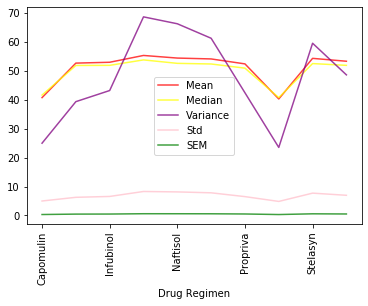

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
mean_tumor.plot(kind="line",alpha=0.75,label="Mean",color="red",rot=90)
median_tumor.plot(kind="line",alpha=0.75,label="Median",color="yellow",rot=90)
variance_tumor.plot(kind="line",alpha=0.75,label="Variance",color="purple",rot=90)
std_tumor.plot(kind="line",alpha=0.75,label="Std",color="pink",rot=90)
sem_tumor.plot(kind="line",alpha=0.75,label="SEM",color="green",rot=90)
plt.legend(loc="best")
plt.show()


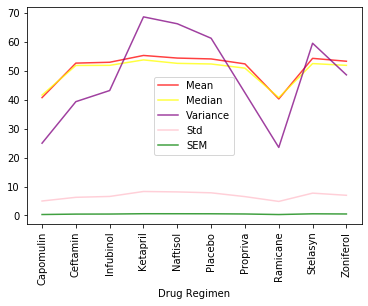

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.plot(summary_statistics_table["Mean"],alpha=0.75,label="Mean",color="red")
plt.plot(summary_statistics_table["Median"],alpha=0.75,label="Median",color="yellow")
plt.plot(summary_statistics_table["Variance"],alpha=0.75,label="Variance",color="purple")
plt.plot(summary_statistics_table["Standard Deviation"],alpha=0.75,label="Std",color="pink")
plt.plot(summary_statistics_table["SEM"],alpha=0.75,label="SEM",color="green")

plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.legend(loc="best")
plt.show()


## Pie plots

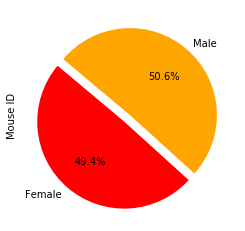

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
combine_group=combine.groupby("Sex")
table_gender=combine_group["Mouse ID"].count()
table_gender
table_gender.plot(kind="pie",explode=(0.1,0),colors=["red","orange"],autopct="%1.1f%%",startangle=140)
plt.show()


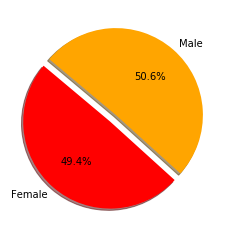

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female","Male"]
sizes=[table_gender["Female"],table_gender["Male"]]
colors=["red","orange"]
explode=(0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()


## Quartiles, outliers and boxplots

The IQR of Capomulin is 7.781863460000004
The lower_bound of Capomulin is 20.70456164999999
The upper_bound of Capomulin is 51.83201549


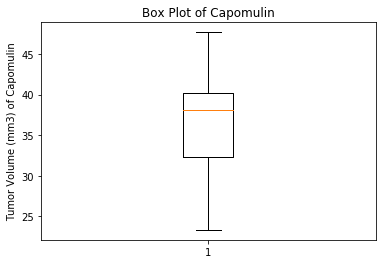

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
combine_filted_Capomulin=combine.loc[combine["Drug Regimen"]=="Capomulin"]
idx = combine_filted_Capomulin.groupby(['Mouse ID'])['Timepoint'].transform(max) == combine_filted_Capomulin['Timepoint']
fianl_Capomulin=combine_filted_Capomulin[idx]

quartiles = fianl_Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("The IQR of Capomulin is "+str(iqr))
print("The lower_bound of Capomulin is "+str(lower_bound))
print("The upper_bound of Capomulin is "+str(upper_bound))
outlayer_Capomulin = fianl_Capomulin.loc[(fianl_Capomulin["Tumor Volume (mm3)"]<lower_bound) | (fianl_Capomulin["Tumor Volume (mm3)"] >upper_bound),:]


fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Capomulin')
ax1.set_ylabel('Tumor Volume (mm3) of Capomulin')
ax1.boxplot(fianl_Capomulin["Tumor Volume (mm3)"])
plt.show()
outlayer_Capomulin

The IQR of Ramicane is 9.098536719999998
The lower_bound of Ramicane is 17.912664470000003
The upper_bound of Ramicane is 54.30681135


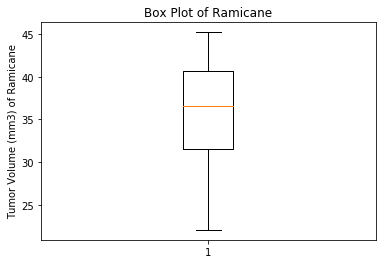

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [8]:
#Ramicane
combine_filted_Ramicane=combine.loc[combine["Drug Regimen"]=="Ramicane"]
idx = combine_filted_Ramicane.groupby(['Mouse ID'])['Timepoint'].transform(max) == combine_filted_Ramicane['Timepoint']
fianl_Ramicane=combine_filted_Ramicane[idx]

quartiles = fianl_Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("The IQR of Ramicane is "+str(iqr))
print("The lower_bound of Ramicane is "+str(lower_bound))
print("The upper_bound of Ramicane is "+str(upper_bound))
outlayer_Ramicane = fianl_Ramicane.loc[(fianl_Ramicane["Tumor Volume (mm3)"]<lower_bound) | (fianl_Ramicane["Tumor Volume (mm3)"] >upper_bound),:]


fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Ramicane')
ax1.set_ylabel('Tumor Volume (mm3) of Ramicane')
ax1.boxplot(fianl_Ramicane["Tumor Volume (mm3)"])
plt.show()
outlayer_Ramicane

The IQR of Ceftamin is 15.577752179999997
The lower_bound of Ceftamin is 25.355449580000002
The upper_bound of Ceftamin is 87.66645829999999


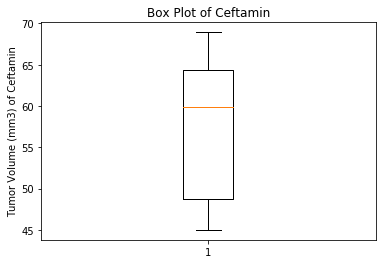

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [9]:
#Ceftamin
combine_filted_Ceftamin=combine.loc[combine["Drug Regimen"]=="Ceftamin"]
idx = combine_filted_Ceftamin.groupby(['Mouse ID'])['Timepoint'].transform(max) == combine_filted_Ceftamin['Timepoint']
fianl_Ceftamin=combine_filted_Ceftamin[idx]

quartiles = fianl_Ceftamin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("The IQR of Ceftamin is "+str(iqr))
print("The lower_bound of Ceftamin is "+str(lower_bound))
print("The upper_bound of Ceftamin is "+str(upper_bound))
outlayer_Ceftamin = fianl_Ceftamin.loc[(fianl_Ceftamin["Tumor Volume (mm3)"]<lower_bound) | (fianl_Ceftamin["Tumor Volume (mm3)"] >upper_bound),:]


fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3) of Ceftamin')
ax1.boxplot(fianl_Ceftamin["Tumor Volume (mm3)"])
plt.show()
outlayer_Ceftamin

The IQR of Infubinol is 11.477135160000003
The lowerq of Infubinol is 54.04860769
The upperq of Infubinol is 65.52574285
The lower_bound of Infubinol is 36.83290494999999
The upper_bound of Infubinol is 82.74144559000001


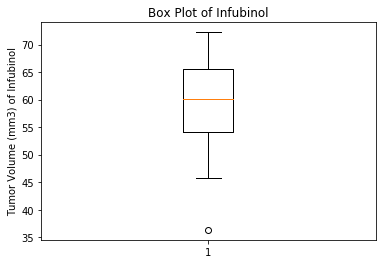

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
669,c326,Infubinol,Female,18,25,5,36.321346,0


In [10]:
#Infubinol
combine_filted_Infubinol=combine.loc[combine["Drug Regimen"]=="Infubinol"]
idx = combine_filted_Infubinol.groupby(['Mouse ID'])['Timepoint'].transform(max) == combine_filted_Infubinol['Timepoint']
fianl_Infubinol=combine_filted_Infubinol[idx]

quartiles = fianl_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("The IQR of Infubinol is "+str(iqr))
print("The lowerq of Infubinol is "+str(lowerq))
print("The upperq of Infubinol is "+str(upperq))
print("The lower_bound of Infubinol is "+str(lower_bound))
print("The upper_bound of Infubinol is "+str(upper_bound))
outlayer_Infubinol = fianl_Infubinol.loc[(fianl_Infubinol["Tumor Volume (mm3)"]<lower_bound) | (fianl_Infubinol["Tumor Volume (mm3)"] >upper_bound),:]
outlayer_Infubinol

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Infubinol')
ax1.set_ylabel('Tumor Volume (mm3) of Infubinol')
ax1.boxplot(fianl_Infubinol["Tumor Volume (mm3)"])
plt.show()
outlayer_Infubinol

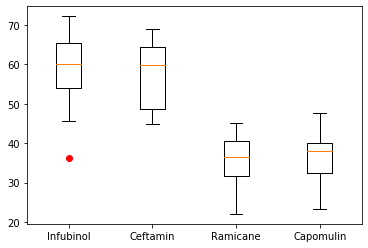

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
datagroup=[fianl_Infubinol["Tumor Volume (mm3)"],fianl_Ceftamin["Tumor Volume (mm3)"],fianl_Ramicane["Tumor Volume (mm3)"],fianl_Capomulin["Tumor Volume (mm3)"]]
labels_list = ['Infubinol','Ceftamin',"Ramicane","Capomulin"]
xlocations  = range(len(datagroup))
width       = 0.3
symbol      = 'ro'
ymin        = 0
ymax        = 10
positions_group = [x-(width+0.01) for x in xlocations]

ax = plt.gca()
ax.set_xticklabels( labels_list, rotation=0 )


plt.boxplot(datagroup, 
            sym=symbol,
            labels=['']*len(labels_list),
            positions=positions_group, 
            widths=width )
plt.show()

## Line and scatter plots

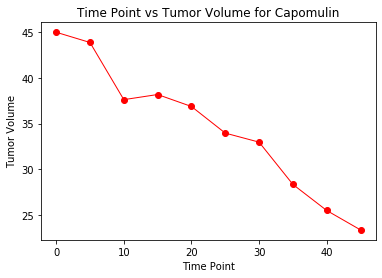

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
combine_filted_Capomulin = combine.loc[combine["Drug Regimen"]=="Capomulin"]
combine_filted_Capomulin=combine_filted_Capomulin.loc[combine_filted_Capomulin["Mouse ID"]=="s185"]
plt.title("Time Point vs Tumor Volume for Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")

plt.plot(combine_filted_Capomulin["Timepoint"], combine_filted_Capomulin["Tumor Volume (mm3)"], marker="o", color="red", linewidth=1)
plt.show()

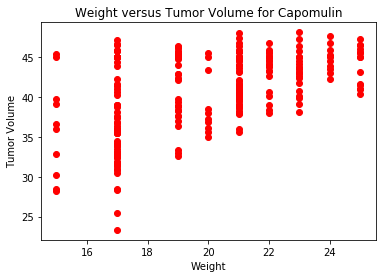

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
combine_filted_Capomulin = combine.loc[combine["Drug Regimen"]=="Capomulin"]

plt.title("Weight versus Tumor Volume for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")

plt.scatter(combine_filted_Capomulin["Weight (g)"], combine_filted_Capomulin["Tumor Volume (mm3)"], marker="o", color="red")
plt.show()

The r-squared is: 0.5256995552077166


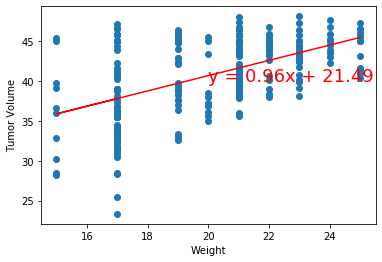

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
combine_filted_Capomulin = combine.loc[combine["Drug Regimen"]=="Capomulin"]
combine_filted_Capomulin

x_values = combine_filted_Capomulin["Weight (g)"]
y_values = combine_filted_Capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=18,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
print(f"The r-squared is: {rvalue}")

plt.show()